In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset("titanic")


In [4]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
data.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [6]:
data.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [7]:
data.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
# STEP 1 - TO STUDY THE GIVEN COLUMNS & INTERRELATIONSHIP BETWEEN THEM

# STEP 2 - PARTITIONED THE DEPENDANT ( TARGET) COLUMN & THE INDEPENDENT (FEATURE) COLUMNS

# STEP 3

# pclass, fare,class,who,adult_male,embarked,alive,alone - drop these 8 columns

In [9]:
data.drop(["pclass","fare","class","who","adult_male","embarked","alive","alone"],axis=1,inplace=True) 
# axis = 1 --> columns
# axis = 0 --> Rows

In [10]:
data

,survived,sex,age,sibsp,parch,deck,embark_town
0,0,male,22.0,1,0,NaN,Southampton
1,1,female,38.0,1,0,C,Cherbourg
2,1,female,26.0,0,0,NaN,Southampton
3,1,female,35.0,1,0,C,Southampton
4,0,male,35.0,0,0,NaN,Southampton
...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,NaN,Southampton
887,1,female,19.0,0,0,B,Southampton
888,0,female,NaN,1,2,NaN,Southampton
889,1,male,26.0,0,0,C,Cherbourg


STEP 4 - TO CHECK WHETHER DATASET IS BALANCED OR NOT - WE WANT TO CHECK BALANCED OR NOT BY CHECKING THE NUMBER OF 0'S & 1'S
IS MORE OR LESS EQUIVALENT TO EACH OTHER OR NOT. THIS IS DONE TO ENSURE THAT THE MODEL DOESN'T HAVE ANY BIASEDNESS IN THE DIFFERENT CLASSES WHILE TAKING THE INPUT W.R.T THE PREDICTED VARIABLE.

In [11]:
# TO CHECK BALANCED OR NOT, WE WILL BE CHECKING THE COUNT OF THE DIFFERENT ELEMENTS IN COLUMN "SURVIVED"

<Axes: xlabel='survived', ylabel='count'>

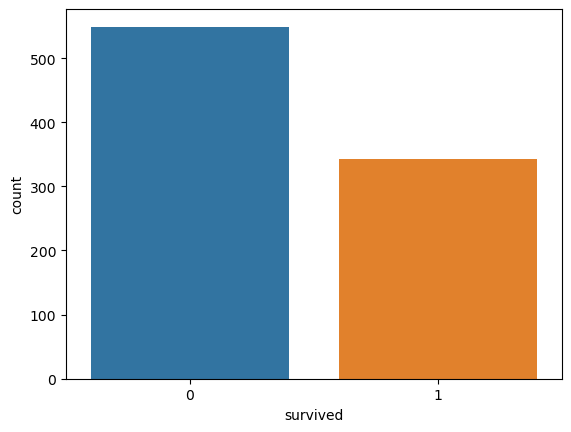

In [12]:
sns.countplot(x="survived",data = data)

In [13]:
data.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [14]:
# WE NEED TO BALANCE THE ABOVE OUTPUT TO GIVE AN UNBIASED INPUT WITHIN THE MODEL. THERE ARE 2 WAYS BALANCING TARGET VARIABLE - 
# UNDERSAMPLING & OVERSAMPLING

In [15]:
data.isnull().sum() # TO CALCULATE THE MISSING VALUES OF ALL THE COLUMNS IN THE DATASET

survived         0
sex              0
age            177
sibsp            0
parch            0
deck           688
embark_town      2
dtype: int64

<Axes: xlabel='parch', ylabel='age'>

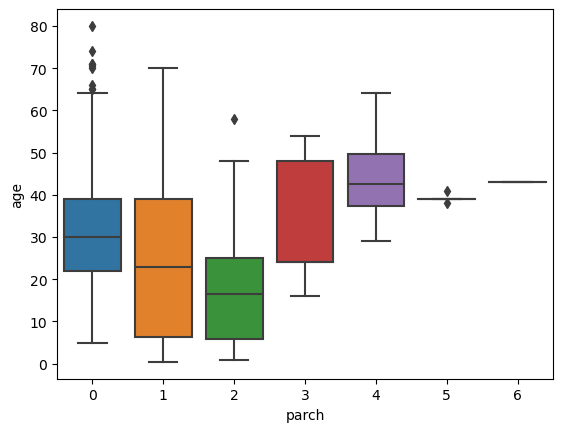

In [16]:
sns.boxplot(x="parch",y="age", data = data) # TO COMPUTE MISSING VALUES OF AGE, 
#WE ARE CEHCKING THE RELATIONSHIP OF AGE COLUMN WITH OTHER COLUMNS OF THE DATASET & AS PER OUR OUTPUT, AGE & PARCH ARE RELATED TO EACH OTHER. SO WE CAN USE PARCH TO COMPUTE THE AGE MISSING VALUES

In [17]:
corr = data.corr()

C:\Users\mppra\AppData\Local\Temp\ipykernel_53508\1351907255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [18]:
corr

,survived,age,sibsp,parch
survived,1.000000,-0.077221,-0.035322,0.081629
age,-0.077221,1.000000,-0.308247,-0.189119
sibsp,-0.035322,-0.308247,1.000000,0.414838
parch,0.081629,-0.189119,0.414838,1.000000


<Axes: >

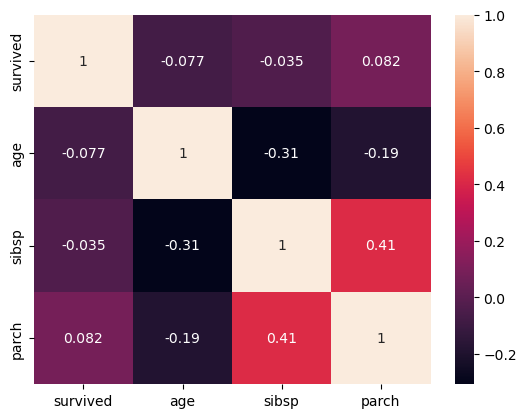

In [19]:
sns.heatmap(corr,annot=True)

In [20]:
data.head(10)

,survived,sex,age,sibsp,parch,deck,embark_town
0,0,male,22.0,1,0,NaN,Southampton
1,1,female,38.0,1,0,C,Cherbourg
2,1,female,26.0,0,0,NaN,Southampton
3,1,female,35.0,1,0,C,Southampton
4,0,male,35.0,0,0,NaN,Southampton
5,0,male,NaN,0,0,NaN,Queenstown
6,0,male,54.0,0,0,E,Southampton
7,0,male,2.0,3,1,NaN,Southampton
8,1,female,27.0,0,2,NaN,Southampton
9,1,female,14.0,1,0,NaN,Cherbourg


In [21]:
                             #  Extracting Insights 

<Axes: xlabel='survived', ylabel='age'>

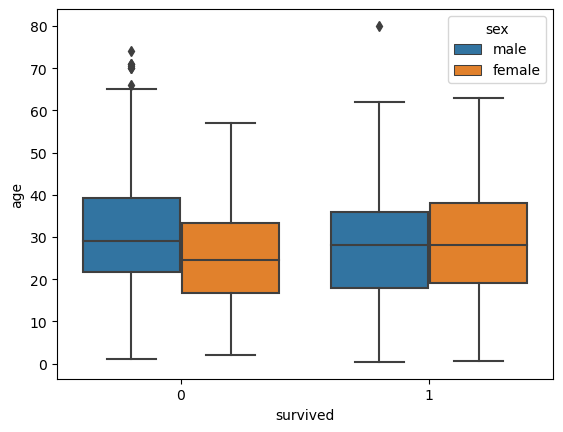

In [22]:
# INSIGHT 1 - WHICH AGE CATEGORY HAS SURVIVED MORE W.R.T THEIR GENDER
sns.boxplot(x="survived",y="age", hue = "sex", data = data)

##### FROM THE ABOVE PLOT, IT LOOKS LIKE FEMALES SURVIVED MORE THAN MALES AROUND 30 AGE CATEGORY (Median dist)

<Axes: xlabel='sex', ylabel='count'>

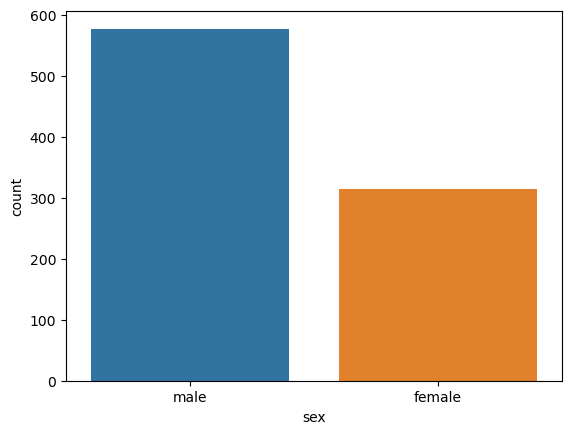

In [23]:
sns.countplot(x="sex", data=data)

In [24]:
# INSIGHT 2 - WHICH DECK HAS MORE SUREVIVAL RATE
data.deck.value_counts().sort_index()

A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='deck', ylabel='survived'>

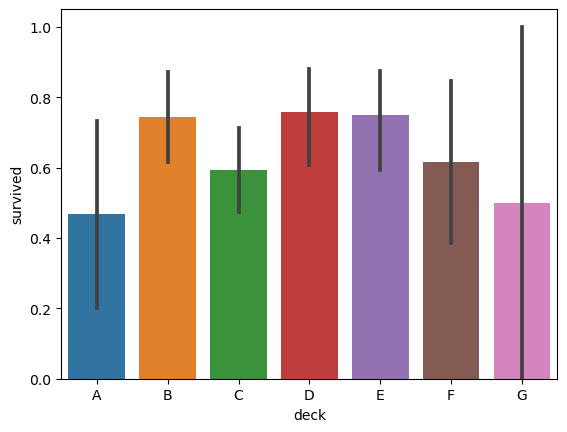

In [25]:
sns.barplot(x="deck",y="survived", data=data) # BETWEEN 2 CATEGORICAL VALUES

<Axes: xlabel='deck', ylabel='survived'>

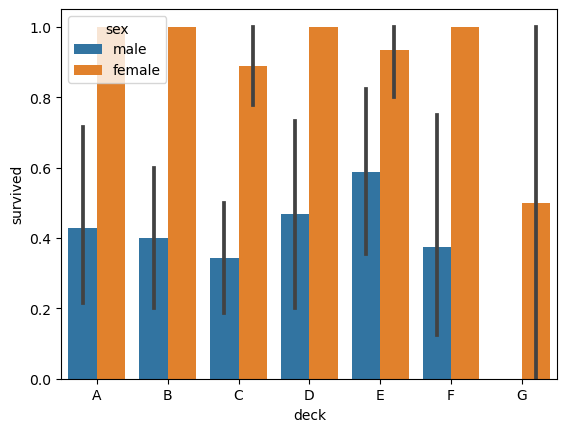

In [26]:
sns.barplot(x="deck",y="survived",hue="sex", data=data)

##### FROM THE ABOVE PLOTS, DECK B, D, E HAVE MORE SUREVIVAL RATES & FEMALES HAVE SURVIVED MORE THAN MALES
  

In [27]:
data.head(10)

,survived,sex,age,sibsp,parch,deck,embark_town
0,0,male,22.0,1,0,NaN,Southampton
1,1,female,38.0,1,0,C,Cherbourg
2,1,female,26.0,0,0,NaN,Southampton
3,1,female,35.0,1,0,C,Southampton
4,0,male,35.0,0,0,NaN,Southampton
5,0,male,NaN,0,0,NaN,Queenstown
6,0,male,54.0,0,0,E,Southampton
7,0,male,2.0,3,1,NaN,Southampton
8,1,female,27.0,0,2,NaN,Southampton
9,1,female,14.0,1,0,NaN,Cherbourg


In [28]:
# INSIGHT 3 - EMBARK_TOWN VS SURVIVAL RATE
embark_town_counts = data.embark_town.value_counts().sort_index()

In [29]:
embark_town_counts

Cherbourg      168
Queenstown      77
Southampton    644
Name: embark_town, dtype: int64

([<matplotlib.patches.Wedge at 0x1fb21729990>,
 [Text(0.911772230064993, 0.6153628201982223, 'Cherbourg'),
  Text(0.12219517070335402, 1.0931918131127667, 'Queenstown'),
  Text(-0.7128397429902672, -0.8377705537995295, 'Southampton')],
 [Text(0.49733030730817795, 0.3356524473808485, '18.90%'),
  Text(0.06665191129273855, 0.5962864435160545, '8.66%'),
  Text(-0.38882167799469114, -0.4569657566179251, '72.44%')])

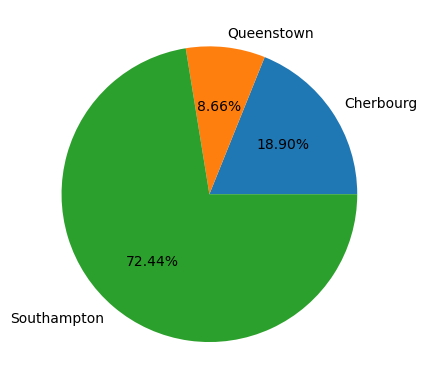

In [30]:
plt.pie(embark_town_counts,labels=embark_town_counts.index,autopct="%1.2f%%")

##### MORE PEOPLE SEEMS FROM SOUTHAMPTON TOWN & SO MORE SURVIVAL RATE FROM THERE WHICH IS POSITIVELY CORRELATED

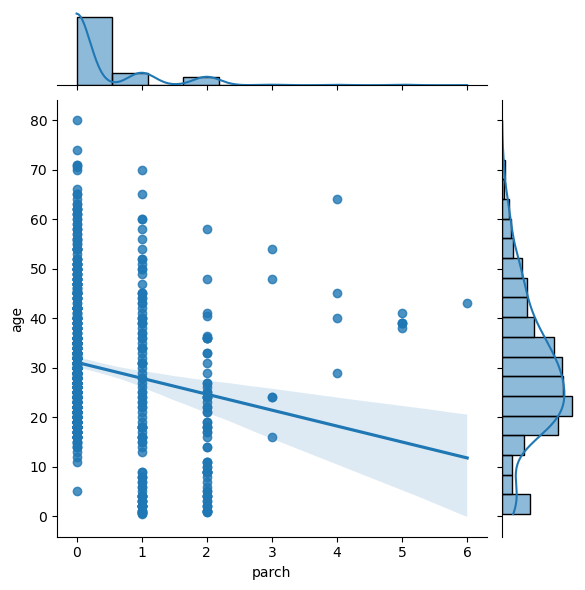

In [31]:
# INSIGHT 4 - PRACTICING JOINTPLOT
# JOINTPLOT 
sns.jointplot(x="parch", y="age", data=data,kind="reg")

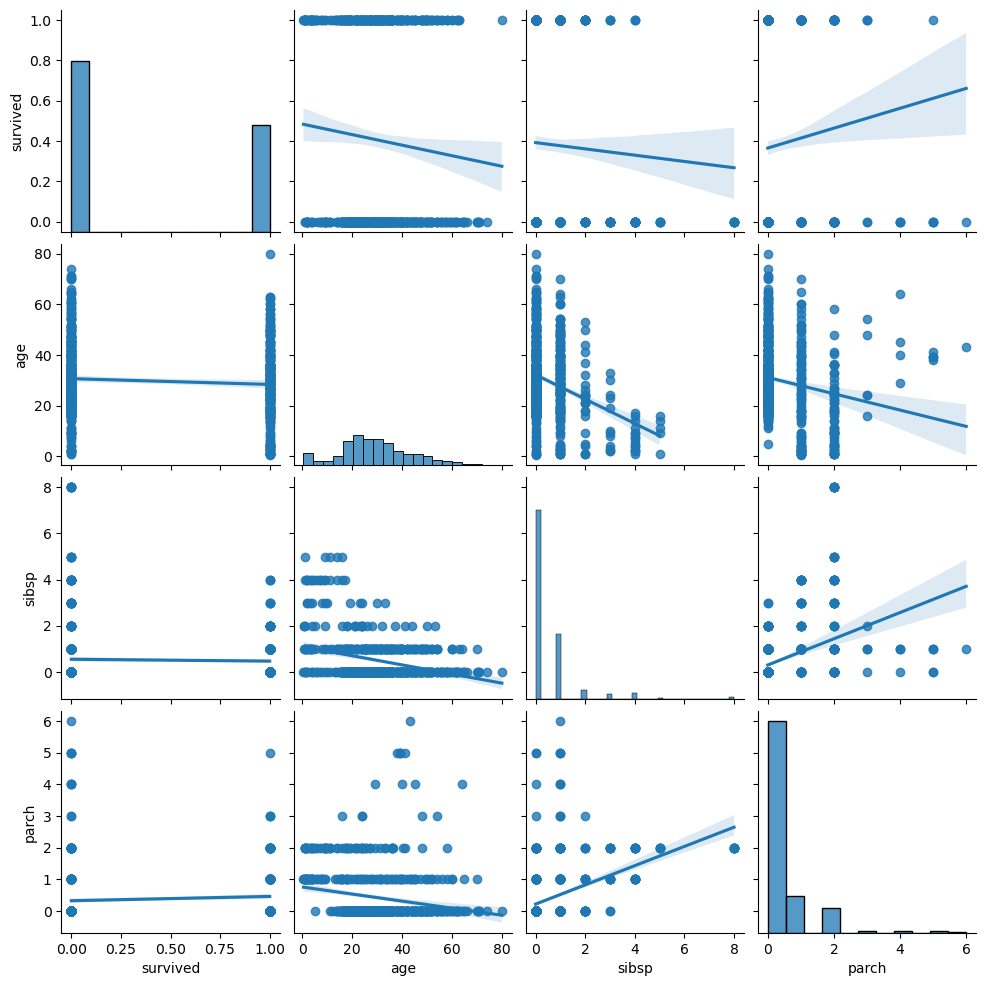

In [32]:
### NEED TO CHECK IF THIS MAKES SENSE OR NOT

sns.pairplot(data,kind="reg")  

In [33]:
# TO DRILL DOWN THE AGE W.R.T PARCH

In [34]:
# CHECKING THE DISTRIBUTION OF SURVIVED VS DIE FROM THE DATASET

<Axes: xlabel='survived', ylabel='count'>

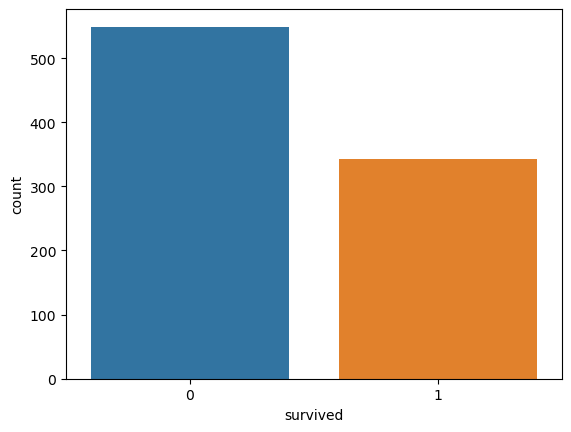

In [35]:
sns.countplot(x="survived",data=data)

SURVIVED = 0 IS MORE WHICH MEANS MORE PEOPLE HAVE DIED, THIS MEANS IT IS AN INBALANCED DATASET BECAUSE THE ELEMENTS OF THE TARGET VARIABLE ARE NOT SAME OR EQUIVALENT.

#THIS MEANS WE HAVE TO BALANCE THE DATASET TO TAKE UNBIASED INPUT DURING MODEL BUILDING( BALANCING HAS 2 TYPES - 1) INCEREASING THE LESSER CLASS WHICH MEANS OVERSAMPLING (SMOTE-SYNTHETIC MINORITY OVERSAMPLING TECHINUE - GENERATES SYNTHETIC SAMPLES BY INTERPOLATING BETWEEN EXISTING INSTANCES OF THE MINORITY CLASS. IT CREATES NEW INSTANCES THAT ARE COMBINATIONS OF NEARBY DATAPOINTS.)

2) DECREASING THE MORE CLASS WHICH MEANS UNDERSAMPLING - RANDOMNLY CHOOSES INSTANCES FROM THE MAJORITY CLASS TO BALANCE THE CLASS DISTRIBUTION

<Axes: xlabel='parch', ylabel='age'>

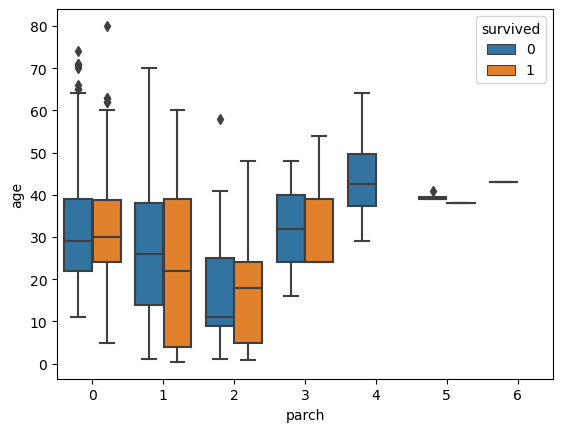

In [36]:
sns.boxplot(x="parch", y = "age", hue = "survived", data= data)

In [37]:
parch_1 = data.groupby(data["parch"]) # GROUPBY ALLOWS THE DATA TO SPLIT IN GROUPS ON SPECIFIED CRITERIA & PERFORM CALCULATIONS OR TRANSFORMATIONS SEPARATELY
parch_1.mean()

C:\Users\mppra\AppData\Local\Temp\ipykernel_53508\4073957681.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parch_1.mean()


,survived,age,sibsp
parch,,,
0,0.343658,32.178503,0.237463
1,0.550847,24.422000,1.084746
2,0.500000,17.216912,2.062500
3,0.600000,33.200000,1.000000
4,0.000000,44.500000,0.750000
5,0.200000,39.200000,0.600000
6,0.000000,43.000000,1.000000


In [38]:
parch_1.median() # THIS MATCHES MORE WITH THE ABOVE BOXPLOT

C:\Users\mppra\AppData\Local\Temp\ipykernel_53508\593682324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parch_1.median() # THIS MATCHES MORE WITH THE ABOVE BOXPLOT


,survived,age,sibsp
parch,,,
0,0.0,30.0,0.0
1,1.0,23.0,1.0
2,0.5,16.5,1.0
3,1.0,24.0,1.0
4,0.0,42.5,1.0
5,0.0,39.0,1.0
6,0.0,43.0,1.0


In [39]:
# TO CHECK MISSING VALUES IN THE DATASET 

In [40]:
data.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
deck           688
embark_town      2
dtype: int64

In [41]:
data.shape

(891, 7)

In [42]:
# WE ARE TREATING THE MISSING VALUES OF AGE W.R.T PARCH BECAUSE AGE VS PARCH SHOW CLEAR IMPACT B/W EACH OTHER

In [43]:
def age1(col):
    age=col[0]
    parch=col[1]
    if pd.isnull(age):
        if parch == 0:
            return 30
        elif parch==1:
            return 23
        elif parch==2:
            return 16
        elif parch==3:
            return 24
        elif parch==4:
            return 43
        elif parch==5:
            return 39
        else:
            return 43
    else:
        return age

In [44]:
data["age"] = data[["age","parch"]].apply(age1,axis=1) # MANIPULATION IN COLUMNS

In [45]:
data.isnull().sum()

survived         0
sex              0
age              0
sibsp            0
parch            0
deck           688
embark_town      2
dtype: int64

In [46]:
data.head()

,survived,sex,age,sibsp,parch,deck,embark_town
0,0,male,22.0,1,0,NaN,Southampton
1,1,female,38.0,1,0,C,Cherbourg
2,1,female,26.0,0,0,NaN,Southampton
3,1,female,35.0,1,0,C,Southampton
4,0,male,35.0,0,0,NaN,Southampton


In [48]:
mode_deck = data["deck"].mode()[0]

In [49]:
mode_deck

'C'

In [50]:
# FILLING THE MISSING VALUES OF DECK COLUMN WITH ITS MODE COLUMN

In [51]:
data["deck"].fillna(mode_deck, inplace=True)

In [52]:
data.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
deck           0
embark_town    2
dtype: int64

In [53]:
# TO COMPUTE THE EMBARK_TOWM MISSING VALUES ( BECAUSE IT HAS JUST 2 NULL VALUES, SO WE ARE DROPPING THE ROWS CORRESPONDING TO 2 ITS NULL VALUES)

In [54]:
data.dropna(subset=["embark_town"] , inplace=True)

In [55]:
data.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
deck           0
embark_town    0
dtype: int64

In [56]:
 # data.dropna( inplace=True) same as line 53

In [57]:
data.head()

,survived,sex,age,sibsp,parch,deck,embark_town
0,0,male,22.0,1,0,C,Southampton
1,1,female,38.0,1,0,C,Cherbourg
2,1,female,26.0,0,0,C,Southampton
3,1,female,35.0,1,0,C,Southampton
4,0,male,35.0,0,0,C,Southampton


In [58]:
data.sex.value_counts()

male      577
female    312
Name: sex, dtype: int64

In [59]:
data.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [60]:
data.deck.value_counts()

C    747
B     45
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [61]:
# APPLYING LABEL ENCODING FOR "SEX" COLUMN AS IT IS NOMINAL ( HAS NO INHERENT ORDERING BETWEEEN THE CATEGORIES)

In [62]:
# IMPORTING THE LabelEncoder CLASS FROM sklearn.preprocessing MODULE
from sklearn.preprocessing import LabelEncoder

In [63]:
# SAVING THE INSTANCE OF THE LABELENCODER CLASS
le = LabelEncoder()

In [64]:
# EXTRACTING THE SEX FROM THE DATASET
gender = data["sex"]
gender

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 889, dtype: object

In [65]:
# APPLY THE FIT_TRANSFORM() METHOD OF THE LABELENCODER INSTANCE TO THE SEX COLUMN TO ENCODE ITS VALUES
gender1 = le.fit_transform(gender)

In [66]:
gender1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [67]:
# CHANGING THE ABOVE ARRAY FORM TO DATAFRAME
gender_df = pd.DataFrame(gender1, columns=["gender"])

In [68]:
gender_df

,gender
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [69]:
# ADDING THE gender_df DATAFRAME TO THE ORIGINAL DATAFRAME AS AN ADDITIONAL COLUMN
data = pd.concat([data, gender_df], axis = 1)

In [70]:
data

,survived,sex,age,sibsp,parch,deck,embark_town,gender
0,0.0,male,22.0,1.0,0.0,C,Southampton,1.0
1,1.0,female,38.0,1.0,0.0,C,Cherbourg,0.0
2,1.0,female,26.0,0.0,0.0,C,Southampton,0.0
3,1.0,female,35.0,1.0,0.0,C,Southampton,0.0
4,0.0,male,35.0,0.0,0.0,C,Southampton,1.0
...,...,...,...,...,...,...,...,...
888,0.0,female,16.0,1.0,2.0,C,Southampton,1.0
889,1.0,male,26.0,0.0,0.0,C,Cherbourg,NaN
890,0.0,male,32.0,0.0,0.0,C,Queenstown,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [71]:
data1 = data.dropna(inplace=True)

In [72]:
data1 # SINCE data1 HAS ONLY THE DROPPED COLUMNS, THERE IS NO OUTPUT WHEN WE RUN THIS CELL

In [73]:
data


,survived,sex,age,sibsp,parch,deck,embark_town,gender
0,0.0,male,22.0,1.0,0.0,C,Southampton,1.0
1,1.0,female,38.0,1.0,0.0,C,Cherbourg,0.0
2,1.0,female,26.0,0.0,0.0,C,Southampton,0.0
3,1.0,female,35.0,1.0,0.0,C,Southampton,0.0
4,0.0,male,35.0,0.0,0.0,C,Southampton,1.0
...,...,...,...,...,...,...,...,...
884,0.0,male,25.0,0.0,0.0,C,Southampton,1.0
885,0.0,female,39.0,0.0,5.0,C,Queenstown,0.0
886,0.0,male,27.0,0.0,0.0,C,Southampton,0.0
887,1.0,female,19.0,0.0,0.0,B,Southampton,1.0


In [74]:
# TO DROP THE SEX COLUMN
data.drop(["sex"], axis=1, inplace=True)

In [75]:
data

,survived,age,sibsp,parch,deck,embark_town,gender
0,0.0,22.0,1.0,0.0,C,Southampton,1.0
1,1.0,38.0,1.0,0.0,C,Cherbourg,0.0
2,1.0,26.0,0.0,0.0,C,Southampton,0.0
3,1.0,35.0,1.0,0.0,C,Southampton,0.0
4,0.0,35.0,0.0,0.0,C,Southampton,1.0
...,...,...,...,...,...,...,...
884,0.0,25.0,0.0,0.0,C,Southampton,1.0
885,0.0,39.0,0.0,5.0,C,Queenstown,0.0
886,0.0,27.0,0.0,0.0,C,Southampton,0.0
887,1.0,19.0,0.0,0.0,B,Southampton,1.0


### ONE-HOT ENCODING

In [76]:
embarked = data["embark_town"]

In [77]:
embarked

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
884    Southampton
885     Queenstown
886    Southampton
887    Southampton
888    Southampton
Name: embark_town, Length: 887, dtype: object

In [78]:
embarked_1 = le.fit_transform(embarked)

In [79]:
embarked_1

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
binary = OneHotEncoder()

In [82]:
binary

OneHotEncoder()

In [83]:
col = binary.fit_transform(embarked_1.reshape(-1, 1))

In [84]:
col

<887x3 sparse matrix of type '<class 'numpy.float64'>'
	with 887 stored elements in Compressed Sparse Row format>

In [85]:
matrix = col.toarray()

In [86]:
matrix

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [87]:
embarked_df = pd.DataFrame(matrix, columns=["C", "S", "Q"])

In [88]:
embarked_df

,C,S,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
882,0.0,0.0,1.0
883,0.0,1.0,0.0
884,0.0,0.0,1.0
885,0.0,0.0,1.0


In [89]:
data = pd.concat([data, embarked_df], axis=1)

In [90]:
data

,survived,age,sibsp,parch,deck,embark_town,gender,C,S,Q
0,0.0,22.0,1.0,0.0,C,Southampton,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,C,Cherbourg,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,C,Southampton,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,C,Southampton,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,C,Southampton,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,C,Southampton,0.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,B,Southampton,1.0,NaN,NaN,NaN
888,0.0,16.0,1.0,2.0,C,Southampton,1.0,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [91]:
data_1 = data.drop(["embark_town", "C"], axis=1, inplace=True)

In [92]:
data

,survived,age,sibsp,parch,deck,gender,S,Q
0,0.0,22.0,1.0,0.0,C,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,C,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,C,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,C,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,C,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,C,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,B,1.0,NaN,NaN
888,0.0,16.0,1.0,2.0,C,1.0,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [93]:
# data.dropna(inplace=True)

### ONE HOT ENCODING ON "DECK" COLUMN

In [94]:
data

,survived,age,sibsp,parch,deck,gender,S,Q
0,0.0,22.0,1.0,0.0,C,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,C,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,C,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,C,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,C,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,C,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,B,1.0,NaN,NaN
888,0.0,16.0,1.0,2.0,C,1.0,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [95]:
data.dropna(inplace=True)

In [96]:
data

,survived,age,sibsp,parch,deck,gender,S,Q
0,0.0,22.0,1.0,0.0,C,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,C,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,C,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,C,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,C,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
882,0.0,22.0,0.0,0.0,C,1.0,0.0,1.0
883,0.0,28.0,0.0,0.0,C,0.0,1.0,0.0
884,0.0,25.0,0.0,0.0,C,1.0,0.0,1.0
885,0.0,39.0,0.0,5.0,C,0.0,0.0,1.0


In [97]:
deck_1 = data["deck"]

In [98]:
deck_1

0      C
1      C
2      C
3      C
4      C
      ..
882    C
883    C
884    C
885    C
886    C
Name: deck, Length: 885, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [99]:
deck_1 = le.fit_transform(deck_1)
deck_1

array([2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 3, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 0, 2, 2, 2, 2, 2, 2, 2, 5, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 6, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2,

In [100]:

from sklearn.preprocessing import OneHotEncoder
binary_1 = OneHotEncoder()
col_1 = binary_1.fit_transform(deck_1.reshape(-1, 1))
matrix_1 = col_1.toarray()
deck_df = pd.DataFrame(matrix_1, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [101]:
deck_df

,A,B,C,D,E,F,G
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
880,0.0,0.0,1.0,0.0,0.0,0.0,0.0
881,0.0,0.0,1.0,0.0,0.0,0.0,0.0
882,0.0,0.0,1.0,0.0,0.0,0.0,0.0
883,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
data = pd.concat([data, deck_df], axis=1)

In [103]:
data

,survived,age,sibsp,parch,deck,gender,S,Q,A,B,C,D,E,F,G
0,0.0,22.0,1.0,0.0,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,38.0,1.0,0.0,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,C,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,C,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,35.0,0.0,0.0,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,25.0,0.0,0.0,C,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
885,0.0,39.0,0.0,5.0,C,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,0.0,27.0,0.0,0.0,C,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [104]:
data.drop(["deck","G"], axis=1,inplace=True)

In [105]:
data.dropna(inplace=True)

In [106]:
data

,survived,age,sibsp,parch,gender,S,Q,A,B,C,D,E,F
0,0.0,22.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,35.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1.0,25.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
881,0.0,33.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
882,0.0,22.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
883,0.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
data.isnull().sum()

survived    0
age         0
sibsp       0
parch       0
gender      0
S           0
Q           0
A           0
B           0
C           0
D           0
E           0
F           0
dtype: int64

In [108]:
data.corr()

,survived,age,sibsp,parch,gender,S,Q,A,B,C,D,E,F
survived,1.000000,-0.066181,-0.033696,0.092801,-0.026049,0.040775,-0.031213,0.004656,0.044516,-0.019254,-0.020047,-0.003106,-0.018885
age,-0.066181,1.000000,-0.292392,-0.218459,0.003626,0.026789,-0.043103,-0.002825,0.013236,-0.031475,0.058053,0.006519,0.004121
sibsp,-0.033696,-0.292392,1.000000,0.425063,0.026280,-0.076752,0.041194,-0.062592,-0.029040,0.056612,-0.018238,-0.032061,0.026815
parch,0.092801,-0.218459,0.425063,1.000000,0.053672,-0.079880,0.046896,-0.040481,0.048693,0.024112,-0.048609,-0.031138,0.013034
gender,-0.026049,0.003626,0.026280,0.053672,1.000000,-0.078830,0.125849,0.078331,-0.093260,0.113341,-0.080241,-0.047807,-0.008590
S,0.040775,0.026789,-0.076752,-0.079880,-0.078830,1.000000,-0.498032,-0.040342,-0.070277,0.111730,-0.060467,-0.037903,-0.003987
Q,-0.031213,-0.043103,0.041194,0.046896,0.125849,-0.498032,1.000000,-0.056357,-0.115269,0.077510,-0.052386,0.038077,0.033214
A,0.004656,-0.002825,-0.062592,-0.040481,0.078331,-0.040342,-0.056357,1.000000,-0.030104,-0.301563,-0.025902,-0.025492,-0.016069
B,0.044516,0.013236,-0.029040,0.048693,-0.093260,-0.070277,-0.115269,-0.030104,1.000000,-0.525337,-0.045122,-0.044407,-0.027994
C,-0.019254,-0.031475,0.056612,0.024112,0.113341,0.111730,0.077510,-0.301563,-0.525337,1.000000,-0.452002,-0.444839,-0.280417


<Axes: >

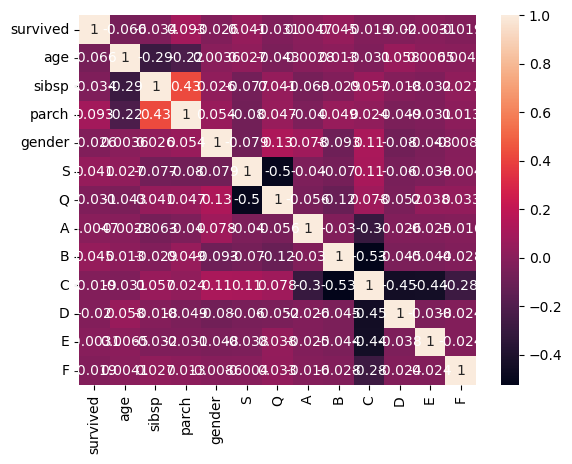

In [109]:
sns.heatmap(data.corr(), annot=True)

In [110]:
# SINCE "PARCH" & "SIBSP" ARE HIGHLY CORELATED, SO WE ARE DROPPING ANY ONE OF THE 2 COLUMNS TO ENSURE THERE IS NO OVERFITTING

In [111]:
data.drop(["sibsp"], axis=1, inplace=True)

In [112]:
data

,survived,age,parch,gender,S,Q,A,B,C,D,E,F
0,0.0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
880,1.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
881,0.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
882,0.0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
883,0.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### SINCE DATA CLEANING IS COMPLETED, WE WILL BUILD THE MODEL NOW. THE DEPENDANT VARIABLE IS CATEGORICAL IN NATURE, SO THIS TYPE OF PBMS ARE KNOWN AS CLASSIFICATION PBMS WHERE LOGISTIC REGRESSION CAN BE A SUITABLE MODEL

In [113]:
x = data.drop(["survived"], axis=1) # PARTITIONING THE ABOVE DATASET INTO X & Y WHERE X IS LIST OF INDEPENDANT VARIABLES (FEATURES) AND Y IS THE DEPENDANT OR TARGET VARIABLE (SURVIVED COLUMN)

In [114]:
x

,age,parch,gender,S,Q,A,B,C,D,E,F
0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
880,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
881,33.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
882,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
883,28.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
y = data["survived"]

In [116]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
Name: survived, Length: 883, dtype: float64

In [117]:
# DIVIDING x & y INTO TRAIN-TEST SPLIT

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42) # RANDOM_STATE = 42 MEANS SETTING THE RANDOM STATE TO A SEPCIFIC VALUE TO HELP ENSURING THE REPRODUCIBILITY OF THE RESULTS (COMMOM RANDOM STATES ARE 0, 42, 91)

In [119]:
x_train, x_test, y_train, y_test

(      age  parch  gender    S    Q    A    B    C    D    E    F
 823  27.0    1.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 558  39.0    1.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 437  24.0    3.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 645  48.0    0.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 423  28.0    1.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 ..    ...    ...     ...  ...  ...  ...  ...  ...  ...  ...  ...
 107  30.0    0.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 271  25.0    0.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 862  48.0    0.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 436  21.0    2.0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 103  33.0    0.0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 
 [662 rows x 11 columns],
       age  parch  gender    S    Q    A    B    C    D    E    F
 44   19.0    0.0     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 807  18.0    0.0     1.0  0.0  1.0  0.0  0.0  1

In [120]:
x_train

,age,parch,gender,S,Q,A,B,C,D,E,F
823,27.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
558,39.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
437,24.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
645,48.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
423,28.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
107,30.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
271,25.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
862,48.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
436,21.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [121]:
x

,age,parch,gender,S,Q,A,B,C,D,E,F
0,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
880,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
881,33.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
882,22.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
883,28.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
x_test

,age,parch,gender,S,Q,A,B,C,D,E,F
44,19.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
807,18.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
721,17.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
661,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
880,25.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
529,23.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
245,44.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
450,36.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
159,16.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [123]:
### BUILDING THE LOGISTIC REGRESSION MODEL ON TRAIN DATA

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lr = LogisticRegression() # HERE lr REPRESENTS THE TRAINED MODEL

In [126]:
lr.fit(x_train,y_train) # FITS THE LOGISTIC REGRESSION MODEL TO THE TRAINING DATA WHERE X_TRAIN REPRESENTS FEATURE VARIABLES & Y_TRAIN REPRESENTS CORESSPONDING TARGET VARIABLE

C:\Users\mppra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
# NOW PREDICTING THE TARGET VARIABLE FOR THE TEST DATA (x_TEST)

In [128]:
y_pred = lr.predict(x_test) # HERE "lr" REPRESENTS THE TRAINED MODEL

In [129]:
y_pred #PREDICTING WHO SURVIVED & WHO DIED IN THE TITANIC SHIP OUT OF THE 221 ROWS IN THE X_TEST DATA

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### CLASSIFICATION OR CONFUSION MATRIX


In [131]:
confusion_matrix = pd.crosstab(y_test,y_pred, 
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0.0,1.0
Actual,,
0.0,131,1
1.0,83,6


In [ ]:
# 131 - TN - MODEL IMPLIES IT IS NEGATIVE INSTANCE & IT IS TRULY NEGATIVE WHICH MEANS THE MODEL SAYS THE PERSON WOULD DIE & REALLY THE PERSON IS DYING AS WELL

In [ ]:
# 6 - TP - MODEL IMPLIES IT IS POSITIVE INSTANCE & IT IS TRULY POSITIVE WHICH MEANS THE MODEL SAYS THE PERSON WOULD SURVIVE & REALLY THE PERSON IS SURVIVING AS WELL

In [ ]:
# 1 - FP - MODEL IS PREDICTING AS POSITIVE BUT THE REAL SCENARIO IS NEGATIVE WHICH MEANS MODEL IMPLIES INDIVIDUALS ARE SURVING BUT ACTUALLY THEY ARE DYING. IT IS THE LEAST DESIARBLE SCENARIO IN THIS CASE , THE LEAST IT IS THE BETTER THE MODEL

In [ ]:
# 83 - FN - MODEL IS PREDICTING AS NEGATIVE BUT THE REAL SCENARIO IS POSITIVE WHICH MEANS MODEL IMPLIES INDIVIDUALS ARE DYING BUT ACTUALLY THEY ARE SURVIVING. 

In [133]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))
print("Precision:" , metrics.precision_score(y_test,y_pred))
print("Recall:" , metrics.recall_score(y_test,y_pred))

Accuracy: 0.6199095022624435
Precision: 0.8571428571428571
Recall: 0.06741573033707865


In [136]:
# ACCURACY - ALMOST 62% OF THE CASES ARE CLASSIFIED CORRECTLY OUT OF TOTAL NUMBER OF INSTANCES

In [135]:
# PRECISION - ALMOST 86% OF THE CASES REPRESENT PROPORTION OF TRUE POSITIVE PREDICTIONS OUT OF TOTAL PREDICTED POSITIVE INSTANCES

In [137]:
# RECALL - ALMOST 7% OF THE CASES REPRESENT PROPORTION OF TRUE POSITIVE PREDICTIONS OUT OF TOTAL ACTUAL POSITIVE INSTANCES

### SCENARIO OF HIGH PRECISION , LOW RECALL 
SCENARIO – IN THIS CASE, THE MODEL IS CAUTIOUS OF MAKING POSITIVE PREDICTIONS & TENDS TO MAKE PREDICTIONS AS POSITIVE ONLY WHEN IT IS VERY CONFIDENT. AS A RESULT, IT AVOIDS FALSE POSITIVES WHICH CONTRIBUTES TO HIGH PRECISION.

IMPLICATION – WHILE THE MODELS POSITIVE PREDICTIONS ARE ACCURATE ( HIGH PRECISION ) IT IS LIKELY TO MISS MANY POSITIVE INSATNCES LEADING TO LOW RECALL. THIS MEANS THAT SOME TRUE POSITIVE CASES AREN’T IDENTIFIED RESULTING IN FALSE NEGATIVES.


### H.W --> TO IMPLY THE CASE OF HIGH RECALL & LOW PRECISION



### SCENARIO OF HIGH RECALL , LOW PRECISION

A high recall indicates that the model is good at identifying positive cases, making TP cases as high.

IMPLICATION – WHILE THE MODELS POSITIVE CASES ARE ACCURATE ( LOW PRECISION ) IT IS LIKELY TO MISS MANY NEGATIVE INSATNCES LEADING TO HIGH RECALL. THIS MEANS THAT SOME TRUE NEGATIVE CASES AREN’T IDENTIFIED RESULTING IN TRUE POSITIVES.


CONCLUSION:

WE HAVE APPLIED LOGISTIC REGRESSION MODEL TO THE CLASSIFICATION PBM & IDENTIFIED THE PREDICTION,

WITHIN THE EVALUATION METRICS,WE HAVE IDENTIFIED ACCURACY SCORE, CONFUSION MATRIX & CASE OF HIGH RECALL & LOW PRECISION.

WE CAN CROSS COMPARE WITH OTHER CLASSIFICATION MODELS AFTER DOING DATA BALANCING.
